# The Lapidarist Problem

**Objective:**
Load, analyze, clean and model diamond data in order to develop a pricing algorithm.

**Libraries:**
* Pandas
* Scikit-learn 
* Seaborn
* Numpy
* XGBoost

### Section 1: Data loading and Cleaning


In [1]:
#Libraries used

import pandas as pd

import numpy as np

import seaborn as sns

from sklearn import preprocessing 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor


In [2]:
#Loading the dabatases and geting their dimensions

df_diam = pd.read_csv("C:\\Users\\52551\\Documents\\Luis\\Shamba\\Intelimetrica\\diamonds.csv")
df_coords = pd.read_csv("C:\\Users\\52551\\Documents\\Luis\\Shamba\\Intelimetrica\\coords_diamonds.csv")
df_stolen_diam =  pd.read_csv("C:\\Users\\52551\\Documents\\Luis\\Shamba\\Intelimetrica\\stolen_diamonds.csv")

print("Diamonds shape: " , df_diam.shape)
print("Diamond coordinates shape: " , df_coords.shape)
print("Stolen diamonds shape: " , df_stolen_diam.shape)

Diamonds shape:  (53930, 11)
Diamond coordinates shape:  (53930, 3)
Stolen diamonds shape:  (10, 13)


In [3]:
#Get a first look of the information en each database

df_diam.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
df_coords.head(10)

,Unnamed: 0,latitude,longitude
0,0,39.8813889,-83.093056
1,1,33.4150000,-111.548889
2,2,40.1672222,-105.101389
3,3,37.3711111,-85.583056
4,4,48.5394444,-121.745000
5,5,38.7705556,-81.553333
6,6,35.5780556,-108.321389
7,7,53.916667,-122.766667
8,8,33.3869444,-84.283056
9,9,47.6063889,-122.330833


In [5]:
#Remove the "Unnamed: 0" columns and make a join between databases to prepare for exploratory analysis

df_diam.drop(columns = "Unnamed: 0", inplace=True)
df_coords.drop(columns = "Unnamed: 0", inplace=True)
df_stolen_diam.drop(columns = "Unnamed: 0", inplace=True)

df = df_diam.merge(df_coords, how="inner", left_index = True, right_index = True)
print("Data Frame Shape: " , df.shape)
df.head(10)

Data Frame Shape:  (53930, 12)


,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,39.8813889,-83.093056
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,33.4150000,-111.548889
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,40.1672222,-105.101389
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,37.3711111,-85.583056
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,48.5394444,-121.745000
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.7705556,-81.553333
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,35.5780556,-108.321389
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,53.916667,-122.766667
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,33.3869444,-84.283056
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,47.6063889,-122.330833


In [6]:
#Checking each data data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53930 non-null  float64
 1   cut         53930 non-null  object 
 2   color       53930 non-null  object 
 3   clarity     53930 non-null  object 
 4   depth       50968 non-null  float64
 5   table       53930 non-null  float64
 6   price       53930 non-null  int64  
 7   x           52840 non-null  float64
 8   y           53345 non-null  float64
 9   z           53930 non-null  float64
 10  latitude    53930 non-null  object 
 11  longitude   53930 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.9+ MB


Here we can see that latitude has an incorrect datatype and that there are 3 categorical variables in our database (cut, color and clarity). Next we´ll see the distribution of each categorical variable and search for errors.

In [7]:
df['cut'].value_counts()

Ideal          21537
Premium        13782
Very Good      12076
Good            4900
Fair            1610
Go?od              2
P?remium           2
*'Ideal            2
Ide&al             2
Id!eal             1
&Ideal             1
Very *'Good        1
&Premium           1
#Very Good         1
Very Go#od         1
V&ery Good         1
Ide*'al            1
Very Goo!d         1
G#ood              1
I#deal             1
Very G#ood         1
Pr?emium           1
Ide!al             1
!Good              1
P*'remium          1
Pre!mium           1
Name: cut, dtype: int64

In [8]:
df['color'].value_counts()

G      11284
E       9789
F       9536
H       8301
D       6773
I       5417
J       2805
*'E        3
&G         2
!E         2
#F         2
?J         2
!I         1
&F         1
?E         1
*'F        1
&E         1
#G         1
#H         1
!F         1
&I         1
*'I        1
?H         1
?G         1
#D         1
!H         1
Name: color, dtype: int64

In [9]:
df['clarity'].value_counts()

SI1       13058
VS2       12249
SI2        9189
VS1        8164
VVS2       5062
VVS1       3653
IF         1790
I1          741
VS?1          2
&VS2          2
#SI!1         1
SI?1          1
V!S2          1
!VS2          1
VVS*'2        1
S*'I1         1
*'SI1         1
VV#S1         1
S?I1          1
VS#2          1
VV?S1         1
S!I2          1
V&S2          1
#VS1          1
S&I1          1
*'SI2         1
V#S2          1
S*'I2         1
SI!1          1
&SI2          1
Name: clarity, dtype: int64

In [10]:
#Cleaning the special characters in each variable

df['cut'] = df['cut'].str.replace('\W', '')
df['color'] = df['color'].str.replace('\W', '')
df['clarity'] = df['clarity'].str.replace('\W', '')

In [11]:
df['cut'].value_counts()

Ideal       21546
Premium     13788
VeryGood    12082
Good         4904
Fair         1610
Name: cut, dtype: int64

In [12]:
df['color'].value_counts()

G    11288
E     9796
F     9541
H     8304
D     6774
I     5420
J     2807
Name: color, dtype: int64

In [13]:
df['clarity'].value_counts()

SI1     13065
VS2     12256
SI2      9193
VS1      8167
VVS2     5063
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [14]:
df["latitude"] = df["latitude"].astype('float')

ValueError: could not convert string to float: '33q.200088'

In [15]:
#Removing the letters found in the latitude column and casting it to a float data type
df["latitude"] = df["latitude"].str.replace(r'\D+', '').astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53930 non-null  float64
 1   cut         53930 non-null  object 
 2   color       53930 non-null  object 
 3   clarity     53930 non-null  object 
 4   depth       50968 non-null  float64
 5   table       53930 non-null  float64
 6   price       53930 non-null  int64  
 7   x           52840 non-null  float64
 8   y           53345 non-null  float64
 9   z           53930 non-null  float64
 10  latitude    53930 non-null  float64
 11  longitude   53930 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.9+ MB


In [16]:
#Checking again that each variable has the correct datatype.

df_stolen_diam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Carat      10 non-null     float64
 1   Cut        10 non-null     object 
 2   Color      10 non-null     object 
 3   Clarity    10 non-null     object 
 4   Depth      10 non-null     float64
 5   Table      10 non-null     float64
 6   x          10 non-null     float64
 7   y          10 non-null     float64
 8   z          10 non-null     float64
 9   latitude   10 non-null     float64
 10  longitude  10 non-null     float64
 11  Price      10 non-null     object 
dtypes: float64(8), object(4)
memory usage: 1.1+ KB


In [17]:
def get_missing_vals (df):
    '''
    Input:
    df - Pandas Dataframe to check for missing values

    Output:
    Prints the columns of the dataframe and their respective percentage of missing values

    '''
    
    return df.isnull().mean().round(2)

In [18]:
get_missing_vals(df)

carat         0.00
cut           0.00
color         0.00
clarity       0.00
depth         0.05
table         0.00
price         0.00
x             0.02
y             0.01
z             0.00
latitude      0.00
longitude     0.00
dtype: float64

In [19]:
#Looking for 0´s in the numerical variables

print("Number of rows with carat == 0: " , (df.carat == 0).sum())
print("Number of rows with depth == 0: " , (df.depth == 0).sum())
print("Number of rows with table == 0: " , (df.table == 0).sum())
print("Number of rows with price == 0: " , (df.price == 0).sum())
print("Number of rows with x == 0: " , (df.x == 0).sum())
print("Number of rows with y == 0: " , (df.y == 0).sum())
print("Number of rows with z == 0: " , (df.z == 0).sum())

Number of rows with carat == 0:  0
Number of rows with depth == 0:  0
Number of rows with table == 0:  0
Number of rows with price == 0:  0
Number of rows with x == 0:  8
Number of rows with y == 0:  7
Number of rows with z == 0:  20


**Imputing options to include all the rows in our analysis**
* mode
* mean
* drop rows with NaN´s

I decided to use the mean of each column to impute missing values in order to include all rows in the analysis. Also, the mode strategy can introduce bias in our data.

In [20]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df = df.fillna(df.mean())

print("Number of rows with x == 0: " , (df.x == 0).sum())
print("Number of rows with y == 0: " , (df.y == 0).sum())
print("Number of rows with z == 0: " , (df.z == 0).sum())

Number of rows with x == 0:  0
Number of rows with y == 0:  0
Number of rows with z == 0:  0


In [21]:
get_missing_vals(df)

carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
latitude      0.0
longitude     0.0
dtype: float64

### Outlier detection and removal

To detect outliers we´ll use a common technique called Inter quartile range (IQR) method.

IQR is defined as the difference between the 75th and 25th percentiles of the data.


carat            AxesSubplot(0.125,0.657941;0.227941x0.222059)
depth         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
table         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
price            AxesSubplot(0.125,0.391471;0.227941x0.222059)
x             AxesSubplot(0.398529,0.391471;0.227941x0.222059)
y             AxesSubplot(0.672059,0.391471;0.227941x0.222059)
z                   AxesSubplot(0.125,0.125;0.227941x0.222059)
latitude         AxesSubplot(0.398529,0.125;0.227941x0.222059)
longitude        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

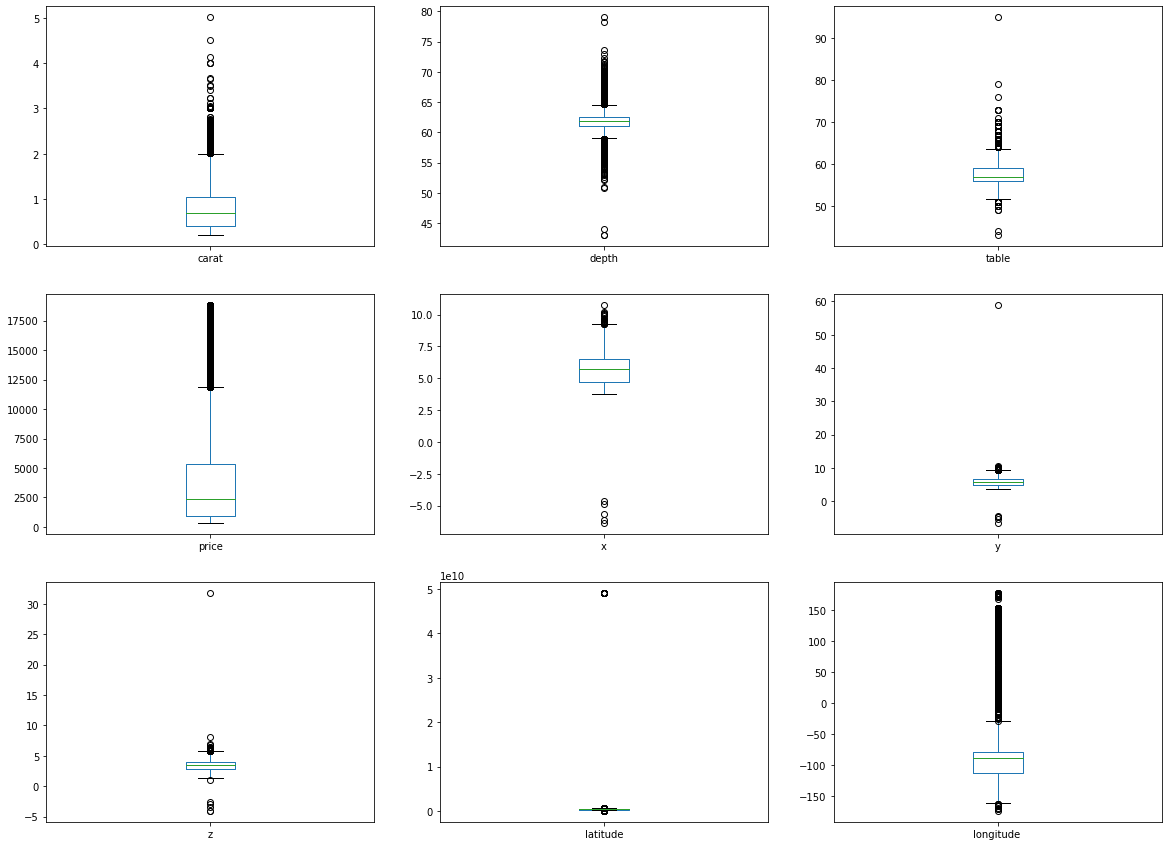

In [23]:
df.plot(kind="box", subplots=True, layout=(3,3),figsize=(20,15))

The next cell has been commented out because all the models were more accurate when the outliers where taken into account. 

def outliers(var):
    
    a = []
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3 - q1
    
    upper_lim = float(q3 + (1.5 * iqr))
    lower_lim = float(q1 - (1.5 * iqr))

    for i in df[var]:
        if i > upper_lim:
            i = np.NaN
        elif i < lower_lim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in df.select_dtypes(exclude='object').columns:
    df[col] = outliers(col)

In [22]:
# Descriptive overview

df.describe(include="all")

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
count,53930.000000,53930,53930,53930,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,5.393000e+04,53930.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21546,11288,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797976,NaN,NaN,NaN,61.749425,57.457328,3933.054942,5.731485,5.733865,3.539453,3.309527e+08,-86.693792
std,0.474035,NaN,NaN,NaN,1.393041,2.234578,3989.628569,1.113934,1.133775,0.705626,9.975255e+08,39.773132
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,-6.370000,-6.610000,-4.060000,1.800000e+01,-173.985008
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,950.000000,4.730000,4.730000,2.910000,2.921056e+08,-112.073333
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.720000,5.720000,3.530000,3.648681e+08,-87.889167
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5325.000000,6.530000,6.530000,4.040000,4.125861e+08,-78.680278


In [26]:
#Analyzing the variables with the greatest correlation to price

df.corr()['price'].sort_values(ascending=False)

price         1.000000
carat         0.921590
x             0.874608
y             0.863988
z             0.863547
table         0.127168
latitude      0.005885
longitude     0.003459
depth        -0.009544
Name: price, dtype: float64

In [27]:
#Preparing categorical variables for our analysis 

label_encoder = preprocessing.LabelEncoder() 

df['cut'] = label_encoder.fit_transform(df['cut'])
df_stolen_diam['Cut'] = label_encoder.transform(df_stolen_diam['Cut'])

df['color'] = label_encoder.fit_transform(df['color'])
df_stolen_diam['Color'] = label_encoder.transform(df_stolen_diam['Color'])

df['clarity'] = label_encoder.fit_transform(df['clarity'])
df_stolen_diam['Clarity'] = label_encoder.transform(df_stolen_diam['Clarity'])

df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,398813889.0,-83.093056
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,334150000.0,-111.548889
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,401672222.0,-105.101389
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,373711111.0,-85.583056
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,485394444.0,-121.745000
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48,387705556.0,-81.553333
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47,355780556.0,-108.321389
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53,53916667.0,-122.766667
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49,333869444.0,-84.283056
9,0.23,4,4,4,59.4,61.0,338,4.00,4.05,2.39,476063889.0,-122.330833


In [28]:
df_stolen_diam.head(10)

,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,latitude,longitude
0,0.71,1,5,7,63.1,58.0,5.64,5.71,3.58,35.026360,-114.383510
1,0.83,2,3,4,62.1,55.0,6.02,6.05,3.75,35.003500,-109.789610
2,0.50,2,1,5,61.5,55.0,5.11,5.16,3.16,35.105440,-106.669673
3,0.39,3,6,4,61.6,59.0,4.67,4.71,2.89,34.946660,-104.647300
4,0.32,3,3,4,62.1,56.0,4.43,4.40,2.74,35.188640,-101.986020
5,0.90,1,2,3,63.3,57.0,6.08,6.14,3.87,35.266110,-99.638740
6,0.51,2,0,4,60.9,57.0,5.20,5.17,3.16,35.515720,-97.670800
7,1.12,2,3,7,62.1,54.8,6.64,6.66,4.13,36.163605,-95.759500
8,0.40,2,3,7,62.4,56.0,4.72,4.74,2.95,37.689186,-92.647300
9,0.36,3,5,5,62.7,59.0,4.54,4.58,2.86,38.663030,-90.218080


## Section 2: Modeling

In [29]:
#Splitting the dataset to test our models 

y_data = df['price']
x_data = df.drop('price',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=0)


print("test sample size :", x_test.shape)
print("training sample size:", x_train.shape)

test sample size : (5393, 11)
training sample size: (48537, 11)


### Linear Regression

In [30]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)
y_pred = lrm.predict(x_test)

print('R^2: ',lrm.score(x_test,y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

R^2:  0.8909495272916794
RMSE:  1315.6755030890286


### Random Forests

In [31]:
#Using Grid Search to find the best parameters for our model

n_estimators = [50,100,200,500]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2]

param_grid = {'n_estimators': n_estimators,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [32]:
rfr = RandomForestRegressor()

rf_grid = GridSearchCV(estimator = rfr,param_grid = param_grid, cv = 3,verbose=2,n_jobs=4)

In [35]:
rf_grid.fit(x_train,y_train)
rf_grid.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed: 11.1min finished


{'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}

In [33]:
rfr  = RandomForestRegressor(min_samples_leaf = 2, min_samples_split = 5, n_estimators = 500)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

print('R^2: ', rfr.score(x_test,y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

R^2:  0.9827592094655578
RMSE:  523.1347865831216


### XGB

In [37]:
xgbm = XGBRegressor()
xgbm.fit(x_train,y_train)
y_pred = xgbm.predict(x_test)

print('R^2: ', xgbm.score(x_test,y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

R^2:  0.9822118879031221
RMSE:  531.3735600376568


## Stolen Diamond Prices prediction

The model with the best accuracy was Random Forest so we´ll use it to predict the stolen diamond´s prices.

In [41]:
y_pred = rfr.predict(df_stolen_diam)
y_pred

array([2400.04356595, 4018.86575354, 1635.69619416,  623.51237374,
        810.86585476, 3485.20410743, 1977.71632063, 9018.27143333,
        942.78887987,  579.73532193])

In [42]:
#Exporting the final prices

y_pred = pd.DataFrame(y_pred)
y_pred.to_csv("C:\\Users\\52551\\Documents\\Luis\\Shamba\\Intelimetrica\\Answers.csv")